# Curbe Bézier


O curba Bézier este o curba parametrica ce are la baza polinoamele Bernstein.
Dandu-se un set de $n+1$ puncte de control $P_0, P_1, ..., P_n$, o curba  Bézier este definita prin urmatoarea relatie:
$$B(n) = (1 - t)^n \cdot P_0 + C_n^1 \cdot (1 - t)^{n - 1} \cdot t \cdot P_1 + ... + C_n^{n - 1} \cdot (1 - t) \cdot t^{n - 1} \cdot P_{n - 1} + t^n \cdot P_n, \; t \in [0, 1],$$
$$B(n) = \sum_{i = 0}^{n} P_i \cdot  B_{i, n}(t), \; t \in [0, 1],$$
unde $B_{i, n}(t)$ este un polinom Bernstein de grad $n$.

## Polinoame Bernstein

Un polinom Bernstein de grad $n$ este definit astfel:
$$B_{i, n}(t) = C_n^i \cdot  (1-t)^{(n-i)} \cdot  t^i$$
pentru $i = \overline{0, n}$, unde  $$C_n^i = \frac{n!}{i!\cdot  (n-i)!}$$

Polinoamele Bernstein se obtin pornind de la identitatea $(1 - t) + t = 1$, ridicand la puterea $n$ si dezvoltand folosind binomul lui Newton.

### Proprietatile polinoamelor Bernstein
- sunt nenegative pe intervalul $[0, 1]$: $B_{i, n}(t) \geq 0$
- polinoamele Bernstein de grad $n$ formeaza o partitie a unitatii: $\sum_{i=0}^{n} B_{i, n}(t) = (1 - t + t)^n = 1$
- simetrie: $B_{i, n}(t) = B_{n - i, n}(1 - t)$
- respecta formula de recurenta: $B_{i, n}(t) = (1 - t)\cdot B_{i,  n - 1}(t) + t\cdot  B_{i - 1, n - 1}(t)$
- functia $B_{i, n}(t)$ are pe intervalul $[0, 1]$ un punct de maxim $t = \displaystyle\frac{i}{n}$


### Vizualizare polinoame Bernstein

In [2]:
function [] = BernsteinDeg0()
    t = linspace(0, 1, 100);

    B00 = (ones(1, 100));
    plot(t, B00, "r");

    title ("Polinom Bernstein de grad 0", "fontsize", 20);
    xlabel("t");
    ylabel("B00");
    h = legend ("B00");
    legend (h, "location", "northeastoutside");
    set (h, "fontsize", 20);
endfunction

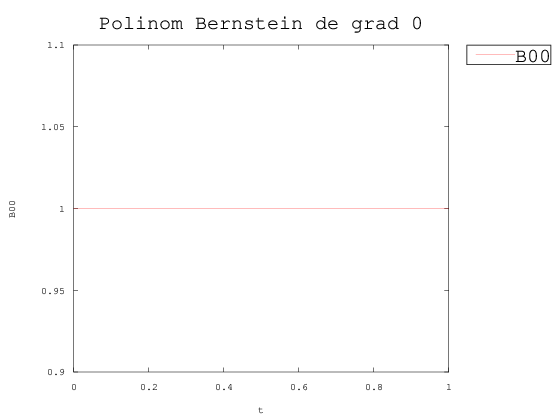

In [6]:
BernsteinDeg0()

In [3]:
function [] = BernsteinDeg1()
    t = linspace(0, 1, 100);

    B01 = 1 - t;
    plot(t, B01, "r");
    hold on;

    B11 = t;
    plot(t, B11, "g");

    title ("Polinom Bernstein de grad 1", "fontsize", 20);
    xlabel("t");
    ylabel("B00, B11");
    h = legend ("B01", "B11");
    legend (h, "location", "northeastoutside");
    set (h, "fontsize", 20);
endfunction

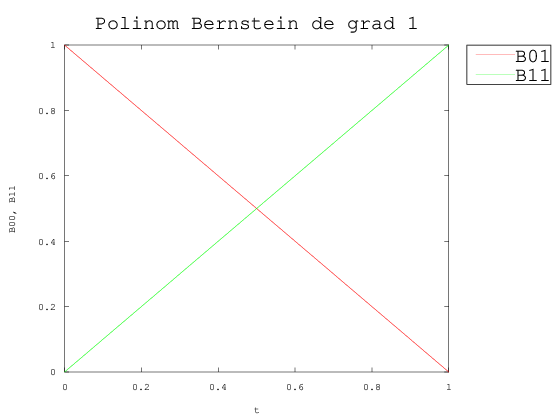

In [7]:
BernsteinDeg1()

In [5]:
function [] = BernsteinDeg2()
    t = linspace(0, 1, 100);

    B02 = (1 - t) .^ 2;
    plot(t, B02, "r");
    hold on;

    B12 = 2 * t .* (1 - t);
    plot(t, B12, "g");
    hold on;

    B22 = t .^ 2;
    plot(t, B22, "y");

    title ("Polinom Bernstein de grad 2", "fontsize", 20);
    xlabel("t");
    ylabel("B02, B12, B22");
    h = legend ("B02", "B12", "B22");
    legend (h, "location", "northeastoutside");
    set (h, "fontsize", 20);
endfunction

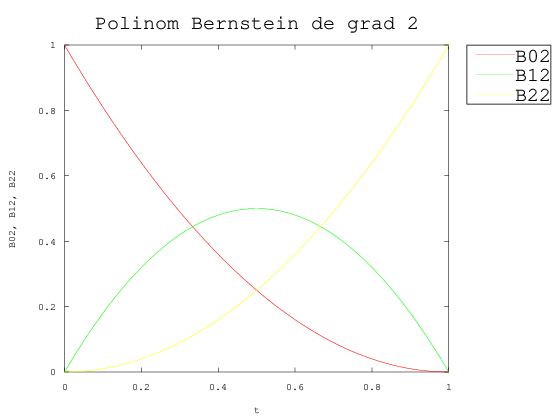

In [8]:
BernsteinDeg2()

In [4]:
function [] = BernsteinDeg3()
    t = linspace(0, 1, 100);

    B03 = (1 - t) .^ 3;
    plot(t, B03, "r");
    hold on;

    B13 = 3 * t .* (1 - t) .^ 2;
    plot(t, B13, "g");
    hold on;

    B23 = 3 * t .^ 2 .* (1 - t);
    plot(t, B23, "y");
    hold on;

    B33 = t .^ 3;
    plot(t, B33, "b");

    title ("Polinom Bernstein de grad 3", "fontsize", 20);
    xlabel("t");
    ylabel("B03, B13, B23, B33");
    h = legend ("B03", "B13", "B23", "B33");
    legend (h, "location", "northeastoutside");
    set (h, "fontsize", 20);
endfunction

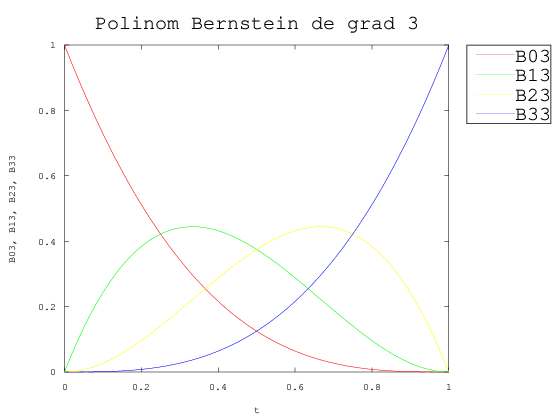

In [9]:
BernsteinDeg3()

## Proprietatile unei curbe Bézier
- nu trece prin toate punctele de control, ci doar prin $P_0$ si $P_n$ ($B(0) = P_0$ si $B(1) = P_n$);
- este tangenta segmentelor $P_0P_1$ si $P_{n-1}P_{n}$;
- este continuta complet in infasuratoarea convexa a punctelor de control;
- este liniara doar daca punctele de control sunt coliniare;
- poate fi descompusa in alte 2 curbe Bézier.

## La ce se folosesc curbele Bézier?
- grafica pe calculator (Adobe Illustrator, Inkscape);
- generare de fonturi (FreeType);
- robotica;
- animatie (Adobe Flash, CSS, JavaScript).

## Tipuri de curbe Bézier

#### Curbe Bézier liniare:
$$B(t) = (1-t)\cdot P_0 + t\cdot P_1$$

![ref](Bézier_1.gif)

In [94]:
function [] = linearBezier()
    pt1 = [ 5; -10];
    pt2 = [45; 15];

    % plotare puncte
    plot(pt1(1), pt1(2), '*');
    hold on;
    plot(pt2(1), pt2(2), '*');
    hold on;

    xlim([0 50]);
    axis equal;

    % ecuatia parametrica
    t = linspace(0, 1, 101);
    pts = kron((1 - t), pt1) + kron(t ,pt2);

    % plotare curba
    plot(pts(1, :), pts(2, :));
    title ("Curba Bezier liniara", "fontsize", 20);
    h = legend ("P0 (punct de control)", "P1 (punct de control)", "Curba Bezier");
    legend (h, "location", "northeastoutside");
endfunction

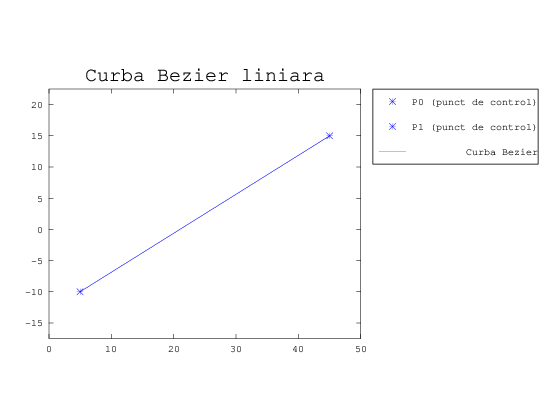

In [95]:
linearBezier()

#### Curbe Bézier cuadratice:
$$B(t) = (1-t)^2\cdot P_0 + 2t\cdot (1-t)\cdot P_1 + t^2\cdot P_2$$
![ref](Bézier_2.gif)

In [96]:
function [] = cuadraticBezier()
    pt1 = [ 5; -10];
    pt2 = [18; 18];
    pt3 = [45; 15];

    % plotare puncte
    plot(pt1(1), pt1(2), '*');
    hold on;
    plot(pt2(1), pt2(2), '*');
    hold on;
    plot(pt3(1), pt3(2), '*');
    hold on;

    xlim([0 50]);
    axis equal;

    % ecuatia parametrica
    t = linspace(0, 1, 101);
    pts = kron((1 - t) .^ 2, pt1) + kron(2 * (1 - t) .* t, pt2) + kron(t .^ 2, pt3);

    % plotare curba
    plot(pts(1, :), pts(2, :));
    title ("Curba Bezier cuatratica", "fontsize", 20);
    h = legend ("P0 (punct de control)", "P1 (punct de control)", "P2 (punct de control)", "Curba Bezier");
    legend (h, "location", "northeastoutside");
endfunction

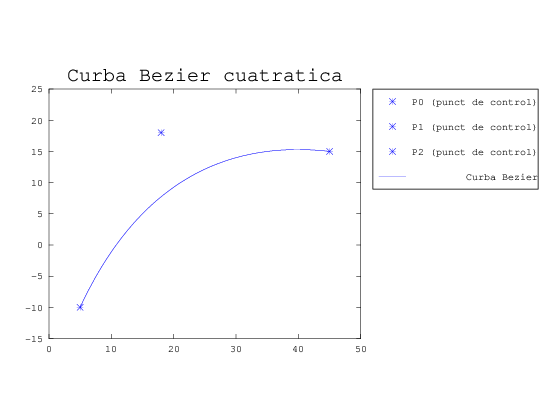

In [97]:
cuadraticBezier()

#### Curbe Bézier cubice:
$$B(t) = (1-t)^3\cdot P_0 + 3t\cdot(1-t)^2\cdot P_1 + t^2\cdot (1-t)\cdot P_2 + t^3\cdot P_3$$
![ref](Bézier_3.gif)

In [100]:
function [] = cubicBezier()
    pt1 = [ 5; -10];
    pt2 = [18; 18];
    pt3 = [45; 15];
    pt4 = [38; -5];

    % plotare puncte
    plot(pt1(1), pt1(2), '*');
    hold on;
    plot(pt2(1), pt2(2), '*');
    hold on;
    plot(pt3(1), pt3(2), '*');
    hold on;
    plot(pt4(1), pt4(2), '*');
    hold on;

    xlim([0 50]);
    axis equal;

    % ecuatia parametrica
    t = linspace(0, 1, 101);
    pts = kron((1 - t) .^ 3, pt1) + kron(3 * (1 - t) .^ 2 .* t, pt2) + kron(3 * (1 - t) .* t .^ 2, pt3) + kron(t .^ 3, pt4);

    % plotare curba
    plot(pts(1, :), pts(2, :));
    title ("Curba Bezier cubica", "fontsize", 20);
    h = legend ("P0 (punct de control)", "P1 (punct de control)", "P2 (punct de control)", "P3 (punct de control)", "Curba Bezier");
    legend (h, "location", "northeastoutside");
endfunction

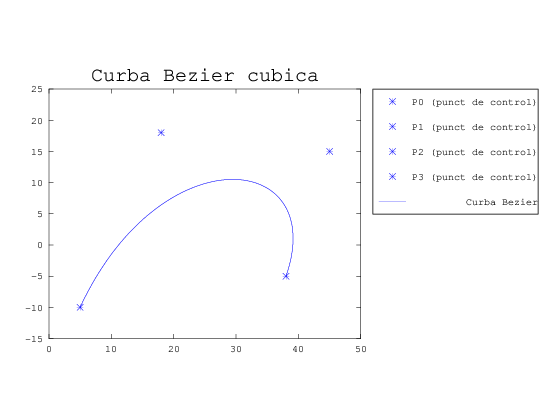

In [101]:
cubicBezier()

Pentru a vedea mai multe animatii ale curbelor Bézier, puteti accesa urmatorul link:
https://www.jasondavies.com/animated-bezier/.

## Comportament numeric

Totusi, folosirea ecuatiei parametrice este instabila numeric, intrucat se pot ridica la puteri mari numere mici (atunci cand $t \approx 0$ sau $t \approx 1$). Un mod eficient de a rezolva aceasta problema este folosirea algoritmului De Casteljau, care poate fi privit ca o interpolare liniara repetata.

# Algoritmul De Casteljau

- memoizare

- desen cu $P_i^{1}$ pct de ctrl

Pentru a construi o curba Bézier se foloseste proprietatea ca orice curba de acest tip poate fi impartita in alte doua curbe Bézier. Pentru acest lucru este nevoie sa gasim doua seturi de puncte de control pentru cele doua noi curbe.

Se foloseste urmatoarea relatie de recurenta, unde $i$ reprezinta indicele punctului de control si $j$ pasul:
$$P_i^{(0)} = P_i, \; i = \overline{0,n}$$
$$P_i^{(j)} =P_i^{(j-1)}\cdot (1-t) + P_{i+1}^{(j-1)}\cdot t \; i = \overline{0,n-j} ; j = \overline{1,n}$$
$$B(t) = P_0^{(n)}$$

Fie $P_i^0$ si $P_{i+1}^0$ doua puncte de control succesive si $P_i^{1}$ un punct care imparte segmentul $P_i^0 P_{i+1}^0$ in raportul $\displaystyle\frac{t}{1-t}$ (raportul intre distanta dintre $P_i^{0}$ si $P_i^{1}$ si cea dintre $P_i^{0}$ si $P_{i+1}^{0}$ este $t$). Rezulta urmatoarea relatie:
$$P_i^{1} = P_i^{0} + t\cdot (P_{i+1}^{0} - P_i^0) = (1-t)\cdot P_i^0 + t\cdot P_{i+1}^0$$

Pornind de la poligonul $P_{0}^{0}$, $P_{1}^{0}$, ..., $P_{n}^{0}$ si aplicand relatia de mai sus, rezulta poligonul $P_{0}^{1}$, $P_{1}^{1}$, ..., $P_{n-1}^{1}$, apoi $P_{0}^{2}$, $P_{1}^{2}$, ..., $P_{n-2}^{2}$, pentru ca in final sa se obtina punctul $P_{0}^{n}$, fiind un punct de pe curba Bézier.

Pentru $n = 3$, algoritmul De Casteljau este ilustrat in urmatorea schema:

![ref](deCasteljau.PNG)

## Probleme propuse
Completati urmatoarea bucata de cod pentru a calcula un punct de pe o curba Bézier, folosind algoritmul prezentat anterior:

In [ ]:
	% coordonatele punctelor de control
    x_original = [1 0.7 2.7 3.7];
	y_original = [0.5 2 2 0.5];

	k = 1;
	n = length(x_original);
	B_x = zeros();
	B_y = zeros();
	hold off; 
		
	for t = 0 : 0.2 : 1
        % plotare puncte de control
		plot(x_original, y_original, 'k-o');
		legend ('puncte de control');
		hold on;

		axis([0.5, 4.5, 0.2, 2.1]);

		x = x_original;
		y = y_original;

        % De Casteljau
		for j = 1 : n - 1
			for i = 1 : n - j 
                % TODO: P(i, j) = (1-t) * P(i, j - 1) + t * P(i + 1, j - 1)
                x(i, j) = (1-t) * x(i, j - 1) + t * x(i + 1, j - 1)
                y(i, j) = (1-t) * y(i, j - 1) + t * y(i + 1, j - 1)
			endfor
		
			%plot(x(1 : n - j), y(1 : n - j), 'r-*');
			hold on;
		
		endfor

        % plotare puncte de pe curba Bezier
		B_x(k) = x(1);
		B_y(k) = y(1);
		plot(B_x, B_y, 'b-s');
		legend ('puncte calculate', 'puncte aflate pe curba Bezier');
		k++;
		
		%pause(0.5);
		hold off;
	endfor	
	